<a href="https://colab.research.google.com/github/TareDevarsh/machine_learning/blob/master/covid19_anaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import math
import pandas_datareader as rd
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [82]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-05-24 (1).xlsx', )
df_data = df.drop(['day','month','year','geoId','countryterritoryCode', 'popData2018', 'continentExp','deaths'],axis = 1)
df_countries = df_data.copy()
df_data.head(5)

,dateRep,cases,countriesAndTerritories
0,2020-05-24,782,Afghanistan
1,2020-05-23,540,Afghanistan
2,2020-05-22,531,Afghanistan
3,2020-05-21,492,Afghanistan
4,2020-05-20,581,Afghanistan


In [83]:
bool_series = df_countries["countriesAndTerritories"].duplicated(keep = 'first') 
df_countries = df_countries[~bool_series]
df_countries['countriesAndTerritories']

0           Afghanistan
136             Albania
213             Algeria
354             Andorra
426              Angola
              ...      
18689           Vietnam
18831    Western_Sahara
18860             Yemen
18905            Zambia
18972          Zimbabwe
Name: countriesAndTerritories, Length: 210, dtype: object

In [84]:
df_cases = df_data.copy()
bool_cases = df_cases.duplicated(subset='countriesAndTerritories')
sum = -1
bias = 0
cont_list = []
for x in bool_cases:
  if(x == True):
    sum = sum + 1
  else:
    bias = bias + 1
    cont_list.append(sum+bias)

# cont_list
print('Repeated:',bool_cases.iloc[18972], '\nCountry:\n' ,df_cases.iloc[18972])

Repeated: False 
Country:
 dateRep                    2020-05-24 00:00:00
cases                                        0
countriesAndTerritories               Zimbabwe
Name: 18972, dtype: object


In [85]:
df_dates  = df_cases.sort_values('dateRep', axis = 0,ascending = False)
bool_dates = df_dates.duplicated(subset='dateRep', keep = 'first')
df_dates = df_dates[~bool_dates]
df_dates.pop('cases')
df_dates.pop('countriesAndTerritories')
pd.set_option('display.max_rows', 20)
df_dates

,dateRep
0,2020-05-24
895,2020-05-23
3324,2020-05-22
15376,2020-05-21
11829,2020-05-20
...,...
10788,2020-01-04
6766,2020-01-03
3319,2020-01-02
14614,2020-01-01


In [86]:
i = 0
for countries in df_countries['countriesAndTerritories']:
  if(i <= 208):
    df_dates[countries] = countries
    df_dates[countries] = np.resize(list(df_cases['cases'].iloc[cont_list[i]:cont_list[i+1]]),len(df_dates))
    i = i + 1
  else:
    break
pd.set_option('display.max_rows', 20)
# df_dates['Afghanistan'] = np.resize(list(df_cases['cases'].iloc[cont_list[i]:cont_list[i+1]]),len(df_dates))
df_dates

,dateRep,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,"Bonaire, Saint Eustatius and Saba",Bosnia_and_Herzegovina,Botswana,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Burundi,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,...,Seychelles,Sierra_Leone,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_of_America,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia
0,2020-05-24,782,8,195,0,0,0,0,704,374,0,11,46,127,3,388,1873,2,941,299,0,0,5,0,336,0,19,0,16508,0,0,0,0,0,0,197,1141,9,-9,8,...,0,15,642,0,1,0,0,1218,25,224,466,21,250,0,379,18,11,0,201,0,0,10,0,0,1186,0,48,432,812,3287,0,21236,0,11,72,0,0,0,7,0
895,2020-05-23,540,12,190,0,2,0,0,718,322,0,14,29,106,0,240,1694,0,932,276,0,0,3,3,392,0,20,1,20803,0,0,36,2,0,1,112,1156,6,0,10,...,0,21,614,1,1,10,0,988,23,0,1787,13,240,0,637,13,1,0,210,3,0,9,0,2,952,0,0,442,994,2615,0,24147,0,4,56,62,0,0,12,54
3324,2020-05-22,531,5,186,0,6,0,0,648,335,0,2,57,118,0,286,1773,0,945,252,0,5,0,0,268,0,18,0,18508,0,0,41,3,0,1,555,1222,7,0,0,...,0,15,448,0,6,0,21,1134,20,54,482,27,410,0,649,36,0,0,204,3,0,14,0,1,961,0,0,476,894,-525,0,25434,0,3,70,58,0,0,13,34
15376,2020-05-21,492,15,165,1,2,0,0,474,230,0,11,18,113,1,356,1617,0,918,192,0,0,0,0,438,0,15,4,19951,0,0,39,3,0,0,204,990,14,0,0,...,0,36,570,0,1,1,71,803,12,0,518,1,137,0,724,40,0,1,207,0,0,2,0,1,972,0,4,354,941,2412,0,23285,0,8,78,75,0,0,13,60
11829,2020-05-20,581,1,176,0,2,0,0,438,218,0,8,78,231,0,348,1251,2,936,232,0,-209,0,0,218,0,16,0,17408,0,0,33,10,0,0,237,1040,7,0,17,...,0,15,451,0,0,1,47,767,32,3,431,35,0,0,422,21,0,0,0,3,0,8,0,1,1022,0,0,260,873,2711,0,19970,0,1,49,131,0,0,37,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10788,2020-01-04,408,0,195,3,2,0,0,41,218,0,0,0,118,0,0,3,0,918,0,0,0,1,0,1,0,3,0,0,0,12,13,17,0,0,0,0,10,88,8,...,2,8,0,0,41,28,71,35,0,1,0,35,0,0,0,0,2,0,17,3,0,0,1,15,16,0,5,0,994,0,0,0,0,6,78,10,0,0,4,11
6766,2020-01-03,262,11,190,1,0,0,0,67,351,0,0,0,113,0,0,1873,2,936,0,0,-209,0,0,0,0,15,5,0,0,2,11,0,0,0,1,0,14,99,0,...,0,5,0,0,14,31,47,55,0,0,0,11,0,0,0,0,0,0,0,0,0,0,2,10,1,0,15,2,894,0,0,0,0,11,49,0,0,0,18,14
3319,2020-01-02,0,4,186,1,7,0,0,30,189,1,0,0,231,0,0,1694,1,922,0,0,0,2,1,7,0,0,0,0,0,4,19,1,0,0,1,0,10,0,1,...,0,4,0,0,16,42,34,34,0,1,0,21,1,0,0,0,1,0,15,3,0,1,0,5,1,0,0,1,941,0,0,0,0,4,12,62,0,0,19,208
14614,2020-01-01,1063,4,165,0,0,0,0,31,239,0,0,0,13,0,0,1773,0,969,0,0,0,1,0,1,0,1,0,0,0,10,11,0,1,0,1,0,6,134,3,...,0,11,0,1,10,22,64,31,0,0,0,25,250,0,0,0,0,0,201,3,0,10,1,4,1186,0,3,432,873,0,0,0,0,3,50,58,0,6,17,5


In [87]:
df_dates  = df_dates.sort_values('dateRep', axis = 0,ascending = True)
df_dates = df_dates.drop(df_dates.head(10).index)
df_dates

,dateRep,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,"Bonaire, Saint Eustatius and Saba",Bosnia_and_Herzegovina,Botswana,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Burundi,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,...,Seychelles,Sierra_Leone,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_of_America,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia
8440,2020-01-10,0,28,0,13,0,0,0,55,0,0,0,0,0,1,0,7,1,0,0,0,0,0,0,7,0,33,0,0,0,13,22,0,0,0,0,0,0,0,0,...,1,11,0,0,69,39,0,243,0,0,0,0,0,0,0,0,0,0,61,0,0,6,1,0,277,0,24,15,0,0,2,0,0,16,8,3,0,0,7,54
4329,2020-01-11,0,12,0,25,0,0,0,75,0,0,0,0,0,0,0,7,0,0,0,0,1,0,0,1,0,4,0,0,0,3,22,11,0,0,29,0,7,0,0,...,0,6,0,0,0,33,0,17,0,0,0,0,0,0,0,0,2,0,90,0,0,0,1,54,289,0,0,6,0,0,0,0,0,25,7,0,0,0,1,0
12350,2020-01-12,0,11,0,20,0,0,0,146,0,0,0,0,0,2,0,3,1,0,0,0,0,3,0,4,0,33,1,0,0,7,29,24,0,0,16,0,14,14,10,...,0,5,0,0,41,51,0,93,0,0,0,0,0,0,0,0,1,0,0,0,0,3,6,0,293,0,33,26,0,0,0,0,0,23,0,0,0,0,0,2
5307,2020-01-13,0,15,0,31,2,0,0,0,0,0,0,0,0,1,0,6,4,0,0,0,0,5,0,7,0,19,0,0,0,1,38,15,0,0,0,0,7,0,8,...,0,12,0,0,0,27,0,46,0,0,0,0,1,0,0,0,7,0,49,0,0,0,3,51,343,0,0,11,0,0,3,0,0,4,10,48,0,0,0,0
10287,2020-01-14,0,11,0,24,2,0,1,167,0,0,0,0,0,0,0,6,8,0,0,0,0,2,1,22,0,0,0,0,0,5,15,32,0,0,16,0,6,0,1,...,0,8,0,1,27,56,0,27,0,0,0,0,0,1,0,0,0,0,68,0,0,5,5,34,561,0,4,29,0,0,6,0,0,27,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11829,2020-05-20,581,1,176,0,2,0,0,438,218,0,8,78,231,0,348,1251,2,936,232,0,-209,0,0,218,0,16,0,17408,0,0,33,10,0,0,237,1040,7,0,17,...,0,15,451,0,0,1,47,767,32,3,431,35,0,0,422,21,0,0,0,3,0,8,0,1,1022,0,0,260,873,2711,0,19970,0,1,49,131,0,0,37,11
15376,2020-05-21,492,15,165,1,2,0,0,474,230,0,11,18,113,1,356,1617,0,918,192,0,0,0,0,438,0,15,4,19951,0,0,39,3,0,0,204,990,14,0,0,...,0,36,570,0,1,1,71,803,12,0,518,1,137,0,724,40,0,1,207,0,0,2,0,1,972,0,4,354,941,2412,0,23285,0,8,78,75,0,0,13,60
3324,2020-05-22,531,5,186,0,6,0,0,648,335,0,2,57,118,0,286,1773,0,945,252,0,5,0,0,268,0,18,0,18508,0,0,41,3,0,1,555,1222,7,0,0,...,0,15,448,0,6,0,21,1134,20,54,482,27,410,0,649,36,0,0,204,3,0,14,0,1,961,0,0,476,894,-525,0,25434,0,3,70,58,0,0,13,34
895,2020-05-23,540,12,190,0,2,0,0,718,322,0,14,29,106,0,240,1694,0,932,276,0,0,3,3,392,0,20,1,20803,0,0,36,2,0,1,112,1156,6,0,10,...,0,21,614,1,1,10,0,988,23,0,1787,13,240,0,637,13,1,0,210,3,0,9,0,2,952,0,0,442,994,2615,0,24147,0,4,56,62,0,0,12,54


In [88]:
df_sum = df_dates.copy()
df_dates = df_sum.pop('dateRep')
for column in df_sum:
  sum = 0 
  row_count = 0
  for i in df_sum[column]:
    sum = sum + i
    df_sum[column].iloc[row_count] = sum
    row_count = row_count + 1
# row_count
df_sum

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,"Bonaire, Saint Eustatius and Saba",Bosnia_and_Herzegovina,Botswana,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Burundi,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,Central_African_Republic,...,Seychelles,Sierra_Leone,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_of_America,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia
8440,0,28,0,13,0,0,0,55,0,0,0,0,0,1,0,7,1,0,0,0,0,0,0,7,0,33,0,0,0,13,22,0,0,0,0,0,0,0,0,0,...,1,11,0,0,69,39,0,243,0,0,0,0,0,0,0,0,0,0,61,0,0,6,1,0,277,0,24,15,0,0,2,0,0,16,8,3,0,0,7,54
4329,0,40,0,38,0,0,0,130,0,0,0,0,0,1,0,14,1,0,0,0,1,0,0,8,0,37,0,0,0,16,44,11,0,0,29,0,7,0,0,0,...,1,17,0,0,69,72,0,260,0,0,0,0,0,0,0,0,2,0,151,0,0,6,2,54,566,0,24,21,0,0,2,0,0,41,15,3,0,0,8,54
12350,0,51,0,58,0,0,0,276,0,0,0,0,0,3,0,17,2,0,0,0,1,3,0,12,0,70,1,0,0,23,73,35,0,0,45,0,21,14,10,2,...,1,22,0,0,110,123,0,353,0,0,0,0,0,0,0,0,3,0,151,0,0,9,8,54,859,0,57,47,0,0,2,0,0,64,15,3,0,0,8,56
5307,0,66,0,89,2,0,0,276,0,0,0,0,0,4,0,23,6,0,0,0,1,8,0,19,0,89,1,0,0,24,111,50,0,0,45,0,28,14,18,3,...,1,34,0,0,110,150,0,399,0,0,0,0,1,0,0,0,10,0,200,0,0,9,11,105,1202,0,57,58,0,0,5,0,0,68,25,51,0,0,8,56
10287,0,77,0,113,4,0,1,443,0,0,0,0,0,4,0,29,14,0,0,0,1,10,1,41,0,89,1,0,0,29,126,82,0,0,61,0,34,14,19,3,...,1,42,0,1,137,206,0,426,0,0,0,0,1,1,0,0,10,0,268,0,0,14,16,139,1763,0,61,87,0,0,11,0,0,95,25,58,0,0,8,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11829,7653,1792,7377,1448,122,6,50,19446,5041,202,7068,16257,3518,196,7532,57189,182,31508,55791,36,264,266,43,10376,12,4618,63,271628,17,191,4480,1556,111,122,8099,79101,749,1406,258,962,...,16,1694,28794,157,2773,2254,3095,37616,11110,1407,232037,1027,6217,22,30799,30535,150,440,14023,3034,48,702,183,1919,306631,24,681,39430,25063,246406,1017,1528568,138,1408,5872,1660,324,24,598,1746
15376,8145,1807,7542,1449,124,6,50,19920,5271,202,7079,16275,3631,197,7888,58806,182,32426,55983,36,264,266,43,10814,12,4633,67,291579,17,191,4519,1559,111,122,8303,80091,763,1406,258,962,...,16,1730,29364,157,2774,2255,3166,38419,11122,1407,232555,1028,6354,22,31523,30575,150,441,14230,3034,48,704,183,1920,307603,24,685,39784,26004,248818,1017,1551853,138,1416,5950,1735,324,24,611,1806
3324,8676,1812,7728,1449,130,6,50,20568,5606,202,7081,16332,3749,197,8174,60579,182,33371,56235,36,269,266,43,11082,12,4651,67,310087,17,191,4560,1562,111,123,8858,81313,770,1406,258,987,...,16,1745,29812,157,2780,2255,3187,39553,11142,1461,233037,1055,6764,22,32172,30611,150,441,14434,3037,48,718,183,1921,308564,24,685,40260,26898,248293,1017,1577287,138,1419,6020,1793,324,24,624,1840
895,9216,1824,7918,1449,132,6,50,21286,5928,202,7095,16361,3855,197,8414,62273,182,34303,56511,36,269,269,46,11474,12,4671,68,330890,17,191,4596,1564,111,124,8970,82469,776,1406,268,1030,...,16,1766,30426,158,2781,2265,3187,40541,11165,1461,234824,1068,7004,22,32809,30624,151,441,14644,3040,48,727,183,1923,309516,24,685,40702,27892,250908,1017,1601434,138,1423,6076,1855,324,24,636,1894


In [0]:
df_sum.insert(0, 'daterep', df_dates.iloc[0:])

In [90]:
df_final = df_sum.copy()
df_final.reset_index(drop = True, inplace = True)
# df_final.set_index('daterep',append = True, inplace = True)
df_final

,daterep,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,"Bonaire, Saint Eustatius and Saba",Bosnia_and_Herzegovina,Botswana,Brazil,British_Virgin_Islands,Brunei_Darussalam,Bulgaria,Burkina_Faso,Burundi,Cambodia,Cameroon,Canada,Cape_Verde,Cases_on_an_international_conveyance_Japan,Cayman_Islands,...,Seychelles,Sierra_Leone,Singapore,Sint_Maarten,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Thailand,Timor_Leste,Togo,Trinidad_and_Tobago,Tunisia,Turkey,Turks_and_Caicos_islands,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_of_America,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia
0,2020-01-10,0,28,0,13,0,0,0,55,0,0,0,0,0,1,0,7,1,0,0,0,0,0,0,7,0,33,0,0,0,13,22,0,0,0,0,0,0,0,0,...,1,11,0,0,69,39,0,243,0,0,0,0,0,0,0,0,0,0,61,0,0,6,1,0,277,0,24,15,0,0,2,0,0,16,8,3,0,0,7,54
1,2020-01-11,0,40,0,38,0,0,0,130,0,0,0,0,0,1,0,14,1,0,0,0,1,0,0,8,0,37,0,0,0,16,44,11,0,0,29,0,7,0,0,...,1,17,0,0,69,72,0,260,0,0,0,0,0,0,0,0,2,0,151,0,0,6,2,54,566,0,24,21,0,0,2,0,0,41,15,3,0,0,8,54
2,2020-01-12,0,51,0,58,0,0,0,276,0,0,0,0,0,3,0,17,2,0,0,0,1,3,0,12,0,70,1,0,0,23,73,35,0,0,45,0,21,14,10,...,1,22,0,0,110,123,0,353,0,0,0,0,0,0,0,0,3,0,151,0,0,9,8,54,859,0,57,47,0,0,2,0,0,64,15,3,0,0,8,56
3,2020-01-13,0,66,0,89,2,0,0,276,0,0,0,0,0,4,0,23,6,0,0,0,1,8,0,19,0,89,1,0,0,24,111,50,0,0,45,0,28,14,18,...,1,34,0,0,110,150,0,399,0,0,0,0,1,0,0,0,10,0,200,0,0,9,11,105,1202,0,57,58,0,0,5,0,0,68,25,51,0,0,8,56
4,2020-01-14,0,77,0,113,4,0,1,443,0,0,0,0,0,4,0,29,14,0,0,0,1,10,1,41,0,89,1,0,0,29,126,82,0,0,61,0,34,14,19,...,1,42,0,1,137,206,0,426,0,0,0,0,1,1,0,0,10,0,268,0,0,14,16,139,1763,0,61,87,0,0,11,0,0,95,25,58,0,0,8,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2020-05-20,7653,1792,7377,1448,122,6,50,19446,5041,202,7068,16257,3518,196,7532,57189,182,31508,55791,36,264,266,43,10376,12,4618,63,271628,17,191,4480,1556,111,122,8099,79101,749,1406,258,...,16,1694,28794,157,2773,2254,3095,37616,11110,1407,232037,1027,6217,22,30799,30535,150,440,14023,3034,48,702,183,1919,306631,24,681,39430,25063,246406,1017,1528568,138,1408,5872,1660,324,24,598,1746
132,2020-05-21,8145,1807,7542,1449,124,6,50,19920,5271,202,7079,16275,3631,197,7888,58806,182,32426,55983,36,264,266,43,10814,12,4633,67,291579,17,191,4519,1559,111,122,8303,80091,763,1406,258,...,16,1730,29364,157,2774,2255,3166,38419,11122,1407,232555,1028,6354,22,31523,30575,150,441,14230,3034,48,704,183,1920,307603,24,685,39784,26004,248818,1017,1551853,138,1416,5950,1735,324,24,611,1806
133,2020-05-22,8676,1812,7728,1449,130,6,50,20568,5606,202,7081,16332,3749,197,8174,60579,182,33371,56235,36,269,266,43,11082,12,4651,67,310087,17,191,4560,1562,111,123,8858,81313,770,1406,258,...,16,1745,29812,157,2780,2255,3187,39553,11142,1461,233037,1055,6764,22,32172,30611,150,441,14434,3037,48,718,183,1921,308564,24,685,40260,26898,248293,1017,1577287,138,1419,6020,1793,324,24,624,1840
134,2020-05-23,9216,1824,7918,1449,132,6,50,21286,5928,202,7095,16361,3855,197,8414,62273,182,34303,56511,36,269,269,46,11474,12,4671,68,330890,17,191,4596,1564,111,124,8970,82469,776,1406,268,...,16,1766,30426,158,2781,2265,3187,40541,11165,1461,234824,1068,7004,22,32809,30624,151,441,14644,3040,48,727,183,1923,309516,24,685,40702,27892,250908,1017,1601434,138,1423,6076,1855,324,24,636,1894


In [0]:
from fbprophet import Prophet

In [0]:
country = 'United_States_of_America'
df_country = df_final.filter(['daterep',country], axis = 1)
# df_afg['dateRep'] = df_final['dateRep'].dt.date
# df_afg['daterep'] = pd.to_datetime(df_afg['daterep'])
df_country = df_country.rename(columns={'daterep': 'ds', country: 'y'})

In [93]:
m = Prophet(interval_width=0.95)
m.fit(df_country)
future = m.make_future_dataframe(periods=80)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
211,2020-08-08
212,2020-08-09
213,2020-08-10
214,2020-08-11
215,2020-08-12


In [94]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# forecast

,ds,yhat,yhat_lower,yhat_upper
211,2020-08-08,3.516601e+06,2.862615e+06,4.157634e+06
212,2020-08-09,3.542653e+06,2.881041e+06,4.195783e+06
213,2020-08-10,3.567166e+06,2.882015e+06,4.229582e+06
214,2020-08-11,3.590749e+06,2.900979e+06,4.265624e+06
215,2020-08-12,3.614846e+06,2.904691e+06,4.295231e+06


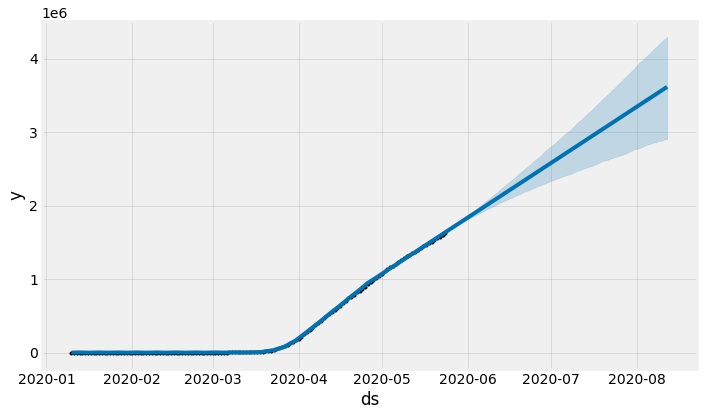

In [95]:
confirmed_forecast_plot = m.plot(forecast)